In [38]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [37]:
dataset = pd.read_csv('iris_dataset/Iris.csv')
dataset = pd.DataFrame(dataset).drop(["Id"],axis='columns')
dataset["Species"] = dataset["Species"].astype('category').cat.codes
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [63]:
model = LogisticRegression()
model.fit(dataset.iloc[:,:4],dataset["Species"])
model.score(dataset.iloc[:,:4],dataset["Species"])

0.9733333333333334

In [64]:
model2  = LinearDiscriminantAnalysis()
model2.fit(dataset.iloc[:,:4],dataset["Species"])
model2.score(dataset.iloc[:,:4],dataset["Species"])

0.98

In [29]:
imbal_data = make_classification(n_samples=1000,n_features=13,n_informative=10,n_classes=2,weights=[0.99,0.01],flip_y=17,class_sep=0.6)
x = pd.DataFrame(imbal_data[0])
y = pd.DataFrame(imbal_data[1])
x= StandardScaler().fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


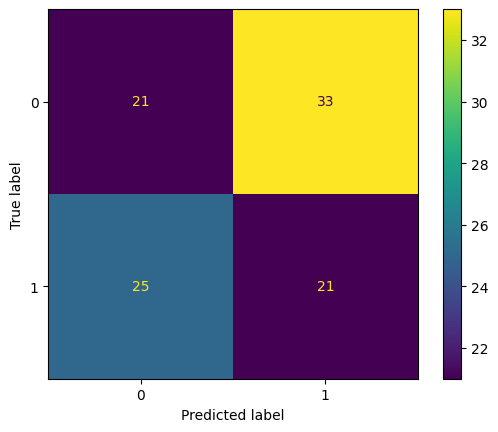

In [37]:
g=GaussianNB()
model3 = g.fit(x_train,y_train)
model3.score(x_train,y_train)
y_pred = model3.predict(x_test)
cm = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
cm.plot()


In [39]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.39      0.46      0.42        46\n           1       0.46      0.39      0.42        54\n\n    accuracy                           0.42       100\n   macro avg       0.42      0.42      0.42       100\nweighted avg       0.43      0.42      0.42       100\n'